# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapa'a
Processing Record 2 of Set 1 | tucuma
Processing Record 3 of Set 1 | ghat
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | taourirt
Processing Record 7 of Set 1 | inari
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | bantay
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 14 of Set 1 | longyearbyen
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | camana
Processing Record 18 of Set 1 | smithers
Processing Record 19 of Set 1 | rio preto da eva
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | cromwell
Processing Record 22 of Set 1 | stanley
P

Processing Record 41 of Set 4 | kalemie
Processing Record 42 of Set 4 | mirny
Processing Record 43 of Set 4 | haiku-pauwela
Processing Record 44 of Set 4 | zouerate
Processing Record 45 of Set 4 | howard springs
Processing Record 46 of Set 4 | fraserburgh
Processing Record 47 of Set 4 | sandnessjoen
Processing Record 48 of Set 4 | maykop
Processing Record 49 of Set 4 | chiili
City not found. Skipping...
Processing Record 50 of Set 4 | lompoc
Processing Record 1 of Set 5 | shimoda
Processing Record 2 of Set 5 | skjern
Processing Record 3 of Set 5 | aykhal
Processing Record 4 of Set 5 | cockburn town
Processing Record 5 of Set 5 | razampeta
Processing Record 6 of Set 5 | istgah-e rah ahan-e garmsar
Processing Record 7 of Set 5 | alma
Processing Record 8 of Set 5 | aasiaat
Processing Record 9 of Set 5 | kununurra
Processing Record 10 of Set 5 | hammerfest
Processing Record 11 of Set 5 | nizhneangarsk
Processing Record 12 of Set 5 | saipan
Processing Record 13 of Set 5 | crane
Processing R

Processing Record 36 of Set 8 | saint-affrique
Processing Record 37 of Set 8 | wyndmoor
Processing Record 38 of Set 8 | shingu
Processing Record 39 of Set 8 | slatyne
Processing Record 40 of Set 8 | narok
Processing Record 41 of Set 8 | deva
Processing Record 42 of Set 8 | padang
Processing Record 43 of Set 8 | pokhara
Processing Record 44 of Set 8 | petropavlovsk-kamchatsky
Processing Record 45 of Set 8 | maputo
Processing Record 46 of Set 8 | aral
Processing Record 47 of Set 8 | narwar
Processing Record 48 of Set 8 | turaif
Processing Record 49 of Set 8 | koulamoutou
Processing Record 50 of Set 8 | saint-francois
Processing Record 1 of Set 9 | pisco
Processing Record 2 of Set 9 | chitipa
Processing Record 3 of Set 9 | terrace
Processing Record 4 of Set 9 | dakhla
Processing Record 5 of Set 9 | new norfolk
Processing Record 6 of Set 9 | nizao
Processing Record 7 of Set 9 | cannonvale
Processing Record 8 of Set 9 | york
Processing Record 9 of Set 9 | kiunga
Processing Record 10 of Set 

Processing Record 26 of Set 12 | plastun
Processing Record 27 of Set 12 | kruisfontein
Processing Record 28 of Set 12 | bassar
Processing Record 29 of Set 12 | lae
Processing Record 30 of Set 12 | bejaia
Processing Record 31 of Set 12 | hopelchen
Processing Record 32 of Set 12 | puerto baquerizo moreno
Processing Record 33 of Set 12 | anqing
Processing Record 34 of Set 12 | panagar
Processing Record 35 of Set 12 | orvieto
Processing Record 36 of Set 12 | isangel
Processing Record 37 of Set 12 | beyneu
Processing Record 38 of Set 12 | brena alta
Processing Record 39 of Set 12 | callao
Processing Record 40 of Set 12 | nizamabad
Processing Record 41 of Set 12 | mouila
Processing Record 42 of Set 12 | caleta de carquin
Processing Record 43 of Set 12 | camiri
Processing Record 44 of Set 12 | selfoss
Processing Record 45 of Set 12 | tatarsk
Processing Record 46 of Set 12 | stuarts draft
Processing Record 47 of Set 12 | bebedja
Processing Record 48 of Set 12 | soio
Processing Record 49 of Set

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapa'a,22.0752,-159.3190,294.14,88,0,3.09,US,1700929568
1,tucuma,-0.1833,-50.0500,304.54,56,53,4.20,BR,1700929568
2,ghat,24.9647,10.1728,292.11,32,0,3.93,LY,1700929568
3,margaret river,-33.9500,115.0667,292.25,58,100,7.23,AU,1700929460
4,tiksi,71.6872,128.8694,249.92,96,100,1.61,RU,1700929568


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapa'a,22.0752,-159.3190,294.14,88,0,3.09,US,1700929568
1,tucuma,-0.1833,-50.0500,304.54,56,53,4.20,BR,1700929568
2,ghat,24.9647,10.1728,292.11,32,0,3.93,LY,1700929568
3,margaret river,-33.9500,115.0667,292.25,58,100,7.23,AU,1700929460
4,tiksi,71.6872,128.8694,249.92,96,100,1.61,RU,1700929568


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

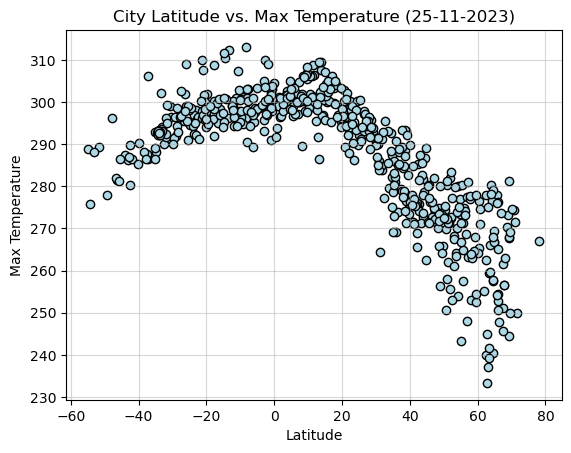

In [22]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, color="lightblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs. Max Temperature (25-11-2023)")
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

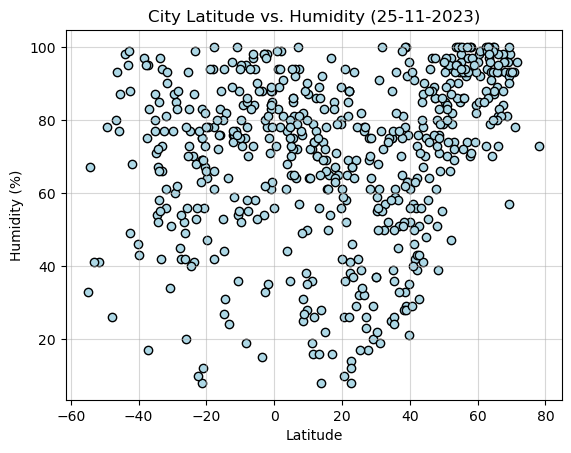

In [23]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, color="lightblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (25-11-2023)")
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

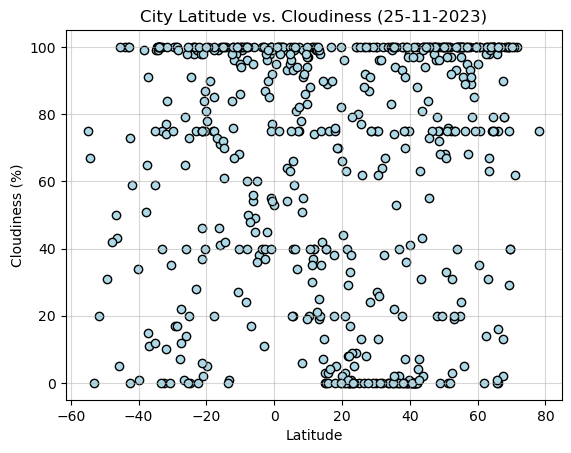

In [24]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, color="lightblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (25-11-2023)")
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

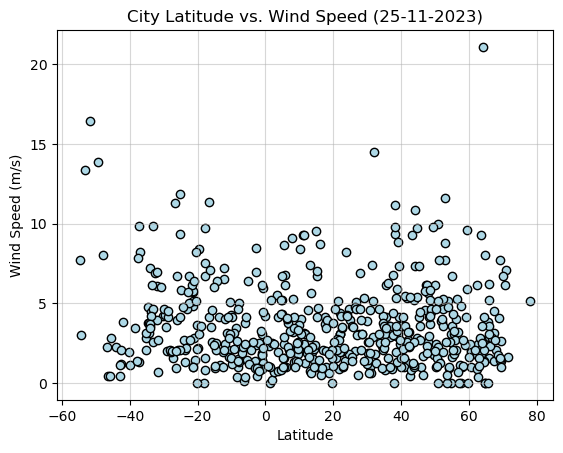

In [25]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, color="lightblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (25-11-2023)")
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kapa'a,22.0752,-159.3190,294.14,88,0,3.09,US,1700929568
2,ghat,24.9647,10.1728,292.11,32,0,3.93,LY,1700929568
4,tiksi,71.6872,128.8694,249.92,96,100,1.61,RU,1700929568
5,taourirt,34.4073,-2.8973,292.59,25,83,2.34,MA,1700929568
6,inari,68.9060,27.0288,273.26,96,100,4.07,FI,1700929568


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tucuma,-0.1833,-50.0500,304.54,56,53,4.20,BR,1700929568
3,margaret river,-33.9500,115.0667,292.25,58,100,7.23,AU,1700929460
8,ushuaia,-54.8000,-68.3000,288.96,33,75,7.72,AR,1700929561
10,blackmans bay,-43.0167,147.3167,286.33,95,100,0.45,AU,1700929569
11,puerto natales,-51.7236,-72.4875,289.40,41,20,16.46,CL,1700929569


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8695863170162537
The r-squared is: 0.7561803627418924


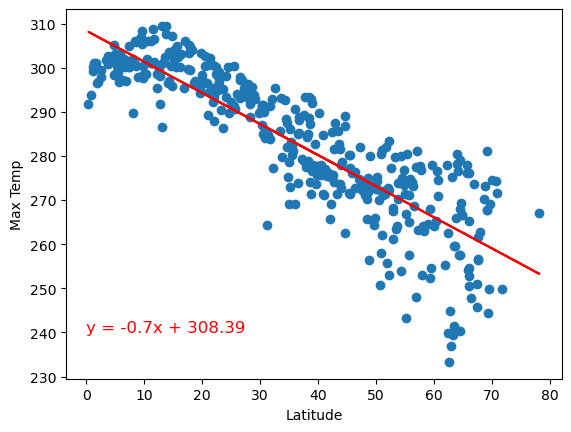

In [48]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,240),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.6504632184352346
The r-squared is: 0.42310239853712367


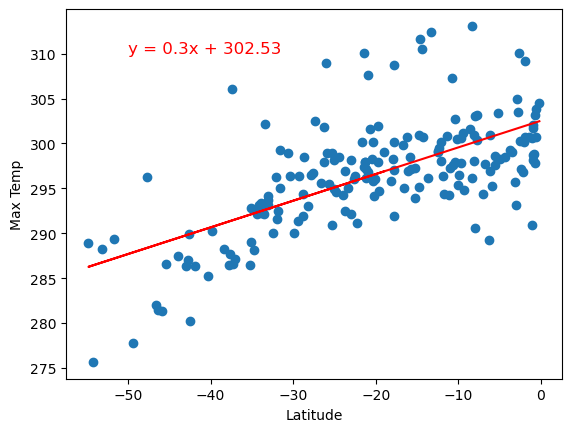

In [49]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,310),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
There is a strong negative correlation between the Latitude and Temperature in the Northern Hemisphere. This shows that the further north you travel, the temperature decreases. In the Southern Hemisphere, there is a moderately strong positive correlation between the 2 variables. Again, this demonstrates that the further south you travel, the temperature decreases. From these results, it is clear that the temperature is higher closer to the equater. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3698194432220977
The r-squared is: 0.13676642058510236


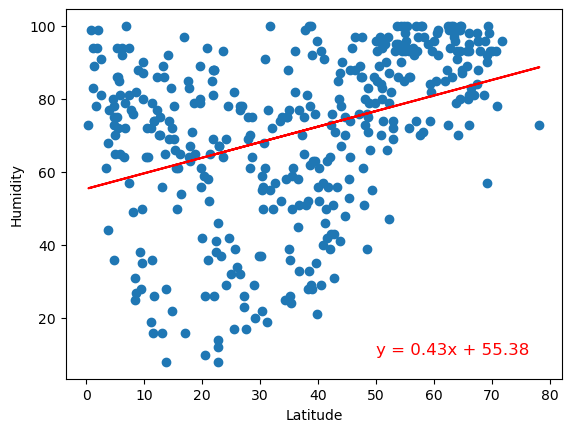

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.1244238577899679
The r-squared is: 0.015481296387338155


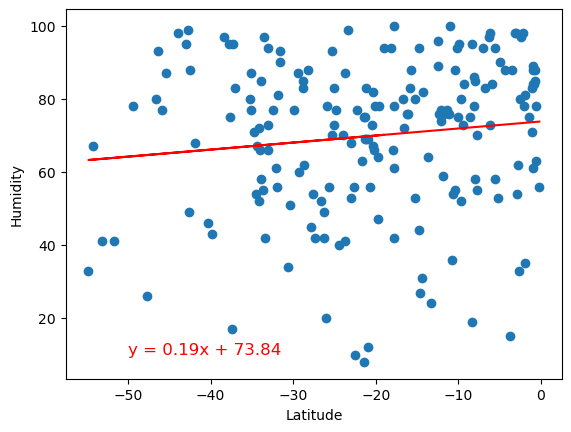

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
There is an extremely weak positive correlation between Latitude and Humidity in the Southern Hemisphere. In the Northern Hemisphere, the correlation is slightly stronger. The linear regression line suggests that the further north you travel, the humidity should increase. Only in latitudes above 50 can this be seen.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1414662877858803
The r-squared is: 0.020012710579917506


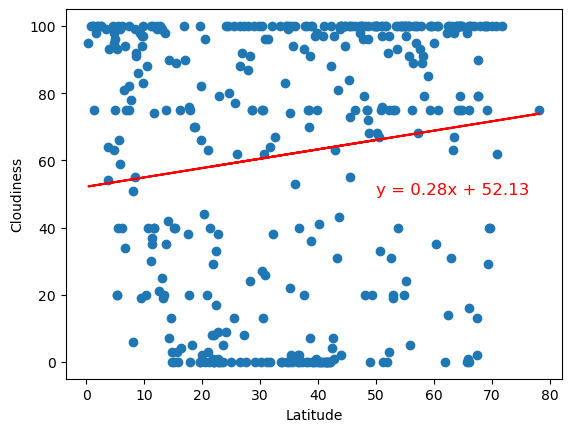

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: 0.19271768255561128
The r-squared is: 0.03714010516960536


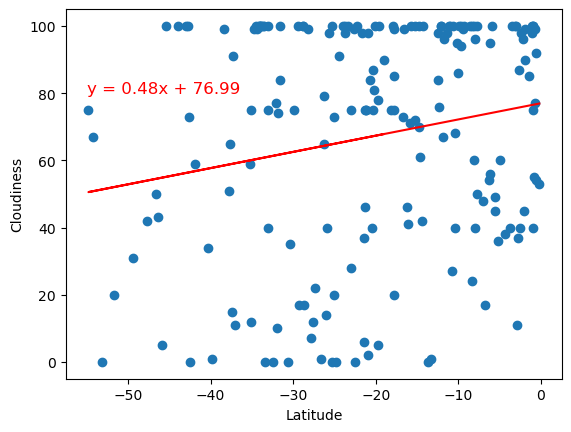

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
There is a very weak positive correlation between Latitude and Cloudiness in both the Northern and Southern Hemisphere. The data is extremely varied, thus it would be difficult to predict cloudiness based on Latitude. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.05064008914994851
The r-squared is: 0.002564418629114733


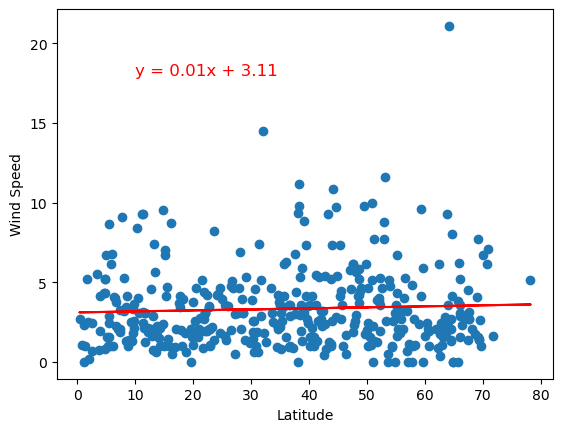

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,18),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-value is: -0.2925705857303567
The r-squared is: 0.085597547634604


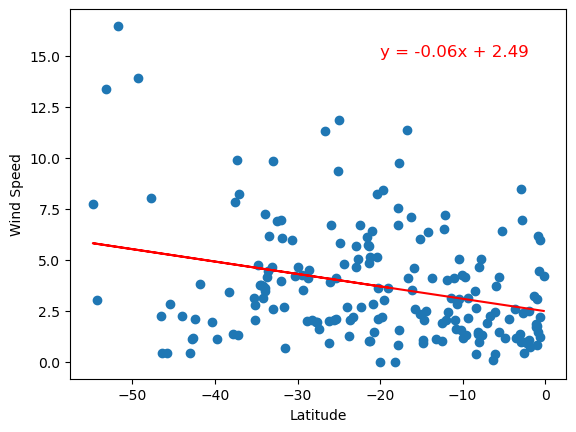

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
There is no correlation between Latitude and Wind Speed in the Northern Hemisphere. However, in the Southern Hemisphere, there is a weak negative correlation between the two variables. This suggests that the closer you get to the equator, wind speed should decrease. 